**Thành viên<br>**
*Võ Quốc Huy - 20081001<br>
Nguyễn Quang Bảo - 20083601<br>
Nguyễn Xuân Giang - 20079601*

## 1. Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import precision_score,f1_score

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('D:/MonHoc/Nam4/Ky1/TriTueNhanTao/CK/DTree/Dtree/appstore_games.csv')
games.head(3)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


## 2. Xử lí dữ liệu

#### Thông tin data

In [3]:
print(games.shape)
print(games.info())

(17007, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  ob

In [4]:
#mô tả dữ liệu
games.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


##### Kiểm tra dữ liệu bị thiếu

In [5]:
total = games.isnull().sum().sort_values(ascending=False)
percent = (total/games.isnull().count()).sort_values(ascending=False)*100
dtype = games.dtypes
na_table = pd.concat([total,percent,dtype], axis=1, keys=['Total', '%', 'Dtype'])
na_table

,Total,%,Dtype
Subtitle,11746,69.065679,object
Average User Rating,9446,55.541836,float64
User Rating Count,9446,55.541836,float64
In-app Purchases,9324,54.824484,object
Languages,60,0.352796,object
Price,24,0.141118,float64
Size,1,0.005880,float64
URL,0,0.000000,object
Original Release Date,0,0.000000,object
Genres,0,0.000000,object


## 3. Làm sạch dữ liệu

##### Xóa cột không sử dụng

In [6]:
games = games.drop(['ID','URL','Subtitle','Icon URL','Description'], axis = 1)

In [7]:
total = games.isnull().sum().sort_values(ascending=False)
percent = (total/games.isnull().count()).sort_values(ascending=False)*100
dtype = games.dtypes
na_table = pd.concat([total,percent,dtype], axis=1, keys=['Total', '%', 'Dtype'])
na_table

,Total,%,Dtype
Average User Rating,9446,55.541836,float64
User Rating Count,9446,55.541836,float64
In-app Purchases,9324,54.824484,object
Languages,60,0.352796,object
Price,24,0.141118,float64
Size,1,0.005880,float64
Name,0,0.000000,object
Developer,0,0.000000,object
Age Rating,0,0.000000,object
Primary Genre,0,0.000000,object


#### Điền các giá trị bị thiếu

In [8]:
#điền các giá trị còn thiếu bằng median()
def na_median(column):
    return column.fillna(column.median())

In [9]:
#size
games['Size']=games['Size'].transform(na_median)

In [10]:
#Price
games['Price']=games['Price'].transform(na_median)

In [11]:
#Average User Rating
games['Average User Rating']=games['Average User Rating'].transform(na_median)

In [12]:
#User Rating Count
games['User Rating Count']=games['User Rating Count'].transform(na_median)

In [13]:
#Điền các ngôn ngữ còn thiếu bằng "EN"
games['Languages'] = games['Languages'].fillna("EN", axis=0)
#Điền các giao dịch mua hàng còn thiếu bằng 0
games['In-app Purchases'] = games['In-app Purchases'].fillna(0, axis=0)

In [14]:
total = games.isnull().sum().sort_values(ascending=False)
percent = (total/games.isnull().count()).sort_values(ascending=False)*100
dtype = games.dtypes
na_table = pd.concat([total,percent,dtype], axis=1, keys=['Total', '%', 'Dtype'])
na_table.head()

,Total,%,Dtype
Name,0,0.0,object
Average User Rating,0,0.0,float64
User Rating Count,0,0.0,float64
Price,0,0.0,float64
In-app Purchases,0,0.0,object


#### Custom data

In [15]:
#Custom lại giá trị Size
games['Size'] = round(games['Size']/1000000, 2)
games.head(2)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.85,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4+,EN,12.33,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


In [16]:
#Xóa dấu "+" ở cột Age Rating và chuyển sang kiểu "int"
games['Age Rating'] = games['Age Rating'].str.replace('+','').astype(int)
games.head(5)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.85,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4,EN,12.33,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,0,Bayou Games,4,EN,0.67,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,0,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21.55,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,0,RoGame Software,4,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34.69,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [17]:
#Xóa bỏ ngày và tháng giữ lại giá trị năm
games['Original Release Date'] = games['Original Release Date'].str.extract(r'\b(\w+)$')
games['Current Version Release Date'] = games['Current Version Release Date'].str.extract(r'\b(\w+)$')
games.head(3)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.85,Games,"Games, Strategy, Puzzle",2008,2017
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4,EN,12.33,Games,"Games, Strategy, Board",2008,2018
2,Morocco,3.0,8376.0,0.00,0,Bayou Games,4,EN,0.67,Games,"Games, Board, Strategy",2008,2017


In [18]:
# Đếm số ngôn ngữ trên app
games['Languages'] = games['Languages'].apply(lambda x: len(x.split(',')))
games.head(5)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4,17,15.85,Games,"Games, Strategy, Puzzle",2008,2017
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4,1,12.33,Games,"Games, Strategy, Board",2008,2018
2,Morocco,3.0,8376.0,0.00,0,Bayou Games,4,1,0.67,Games,"Games, Board, Strategy",2008,2017
3,Sudoku (Free),3.5,190394.0,0.00,0,Mighty Mighty Good Games,4,17,21.55,Games,"Games, Strategy, Puzzle",2008,2017
4,Senet Deluxe,3.5,28.0,2.99,0,RoGame Software,4,15,34.69,Games,"Games, Strategy, Board, Education",2008,2018


In [19]:
games['Genres'].unique()

array(['Games, Strategy, Puzzle', 'Games, Strategy, Board',
       'Games, Board, Strategy', ..., 'Games, Strategy, Sports, Music',
       'Social Networking, Games, Strategy, Casual',
       'Sports, Racing, Games, Strategy'], dtype=object)

In [20]:
#Chia thành 2 thể loại
Primary_Genre = [] # Thể loại chính
Secondary_Genre = []# Thể loại phụ
for x in games['Genres']:
    Primary_Genre.append(x.split(',')[0])
    Secondary_Genre.append(x.split(',')[1])
    
games['Primary Genre'] = Primary_Genre
games['Genres'] = Secondary_Genre

In [21]:
games.head(2)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4,17,15.85,Games,Strategy,2008,2017
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4,1,12.33,Games,Strategy,2008,2018


In [22]:
games.rename(columns={"Genres": "Secondary Genre"}, inplace = True)

In [23]:
games['In-app Purchases'] = games['In-app Purchases'].apply(lambda x:1 if x!= 0 else 0)

In [24]:
games.tail(2)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Secondary Genre,Original Release Date,Current Version Release Date
17005,FaTaLL,4.5,46.0,0.0,1,Tayrem Games,4,1,196.75,Games,Strategy,2019,2019
17006,The Three Kingdoms :Bomb,4.5,46.0,0.0,0,ming bo tang,4,2,22.95,Games,Strategy,2019,2019


In [25]:
games['In-app Purchases'].unique()

array([0, 1], dtype=int64)

## 5. EDA

In [26]:
a = []
b = []
for x,y in games['Developer'].value_counts()[:10].iteritems():
    a.append(x)
    b.append(y)
    
    
fig = go.Figure([go.Bar(x=a ,y=b, text=b, marker_color='red')])
fig.update_layout(template='plotly_white',title_text='Top 10 nhà phát triển ứng dụng')
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Developer',tickfont_size=12)
fig.show()

In [27]:
a = []
b = []
for x,y in games.groupby('Primary Genre')[['Size']].mean().sort_values(by = ['Size'], ascending = False).iteritems():
    for w,z in y.iteritems():
        a.append(w)
        b.append(z)
          
fig = go.Figure([go.Bar(x =a ,y = b, marker_color='purple')])
fig.update_layout(template='plotly_white',title_text='Kích thước ứng dụng theo thể loại')
fig.update_yaxes(title_text='Size')
fig.update_xaxes(title_text='Genre',tickfont_size=15)
fig.show()        

In [28]:
a = []
b = []
for x,y in games['Average User Rating'].value_counts().iteritems():
    a.append(x)
    b.append(y)
    
     
fig = go.Figure([go.Bar(x=a, y=b , text=b, textposition='outside', marker_color='darkblue')])
fig.update_layout(template='plotly_white',title_text='Số lượng các lượt xếp hạng')
fig.update_yaxes(title_text='Count')
fig.update_xaxes(title_text='Ratings',tickfont_size=18)
fig.show()    

In [29]:
#top10 game
top10_count = games[games['User Rating Count']>9000][['Name','Average User Rating','User Rating Count']].sort_values(by='User Rating Count',ascending=False)[:10]
fig = px.bar(top10_count, x='Name', y='User Rating Count',
             hover_data=['Average User Rating'],color='Average User Rating',
             labels={'User Rating Count'},width=700)
fig.show()

##### Correlation heatmap

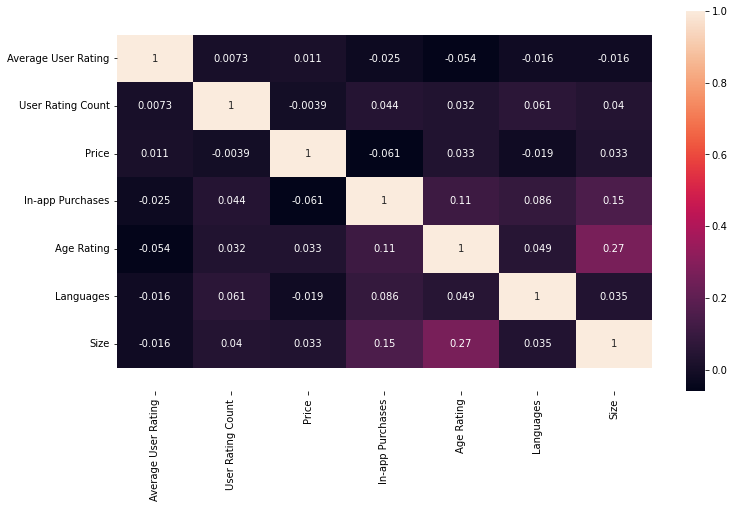

In [30]:
f,ax= plt.subplots(figsize=(12,7))
g = sns.heatmap(games.corr(),annot= True)
bottom, top = g.get_ylim()
g.set_ylim(bottom+.5, top-.5)
plt.show()

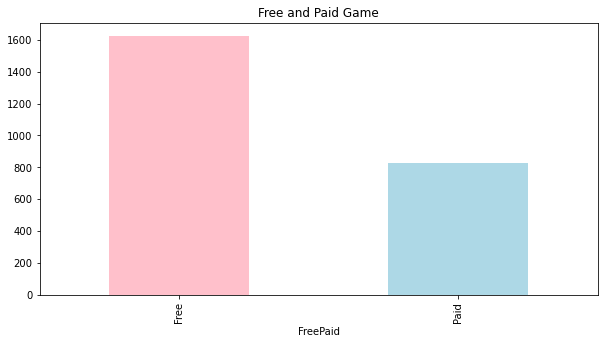

In [31]:
#Price
#chia 2 loai game: free & paid'
games['FreePaid']= ['Free' if i == 0 else 'Paid' for i in games.Price]
plt.figure(figsize=(10,5))
games.groupby(['FreePaid'])['User Rating Count'].mean().plot.bar(color = ["pink","lightblue"])
plt.title("Free and Paid Game")
plt.show()

<AxesSubplot:xlabel='Average User Rating', ylabel='count'>

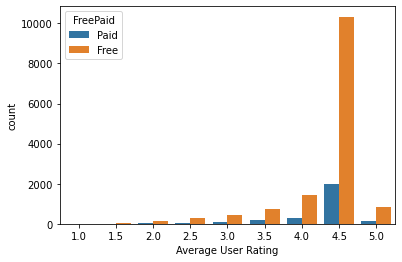

In [32]:
#Game miễn phí và trả phí với lượt đánh giá
sns.countplot(data =games, hue='FreePaid',x = 'Average User Rating')

In [33]:
#chia loại Price: cao, thấp, trung bình, miễn phí
price_range = games['Price'].dropna().map(lambda x : "Free" if x ==0.00 else("Low" if 0.99<=x<=4.99 else ("Medium" if 5.99<= x<= 19.99 else "Hight")))
price_range.value_counts()

Free      14236
Low        2464
Medium      270
Hight        37
Name: Price, dtype: int64

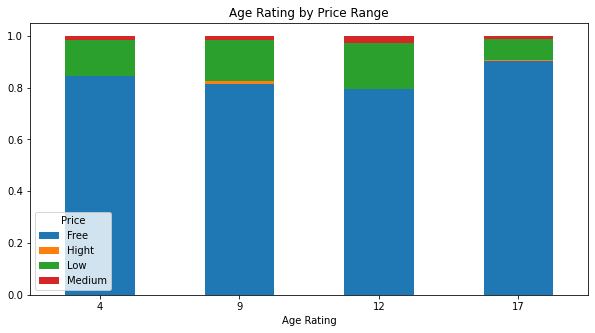

In [34]:
priceRange = pd.crosstab(games['Age Rating'],price_range,normalize=0)
priceRange.plot.bar(stacked = True, figsize=(10,5))
plt.xticks(rotation = 0)
plt.title('Age Rating by Price Range')
plt.show()

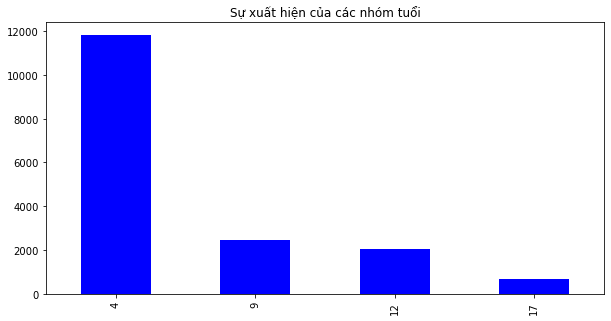

In [35]:
# Age rating
plt.figure(figsize=(10,5))
games['Age Rating'].value_counts().plot.bar(color= "blue")
plt.title("Sự xuất hiện của các nhóm tuổi")
plt.show()

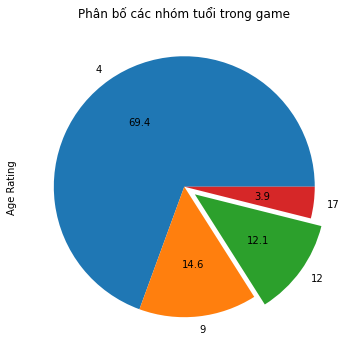

In [36]:
games['Age Rating'].value_counts().plot.pie(autopct = "%1.1f",explode=[0,0,0.1,0],figsize=(6,6))
plt.title("Phân bố các nhóm tuổi trong game")
plt.show()

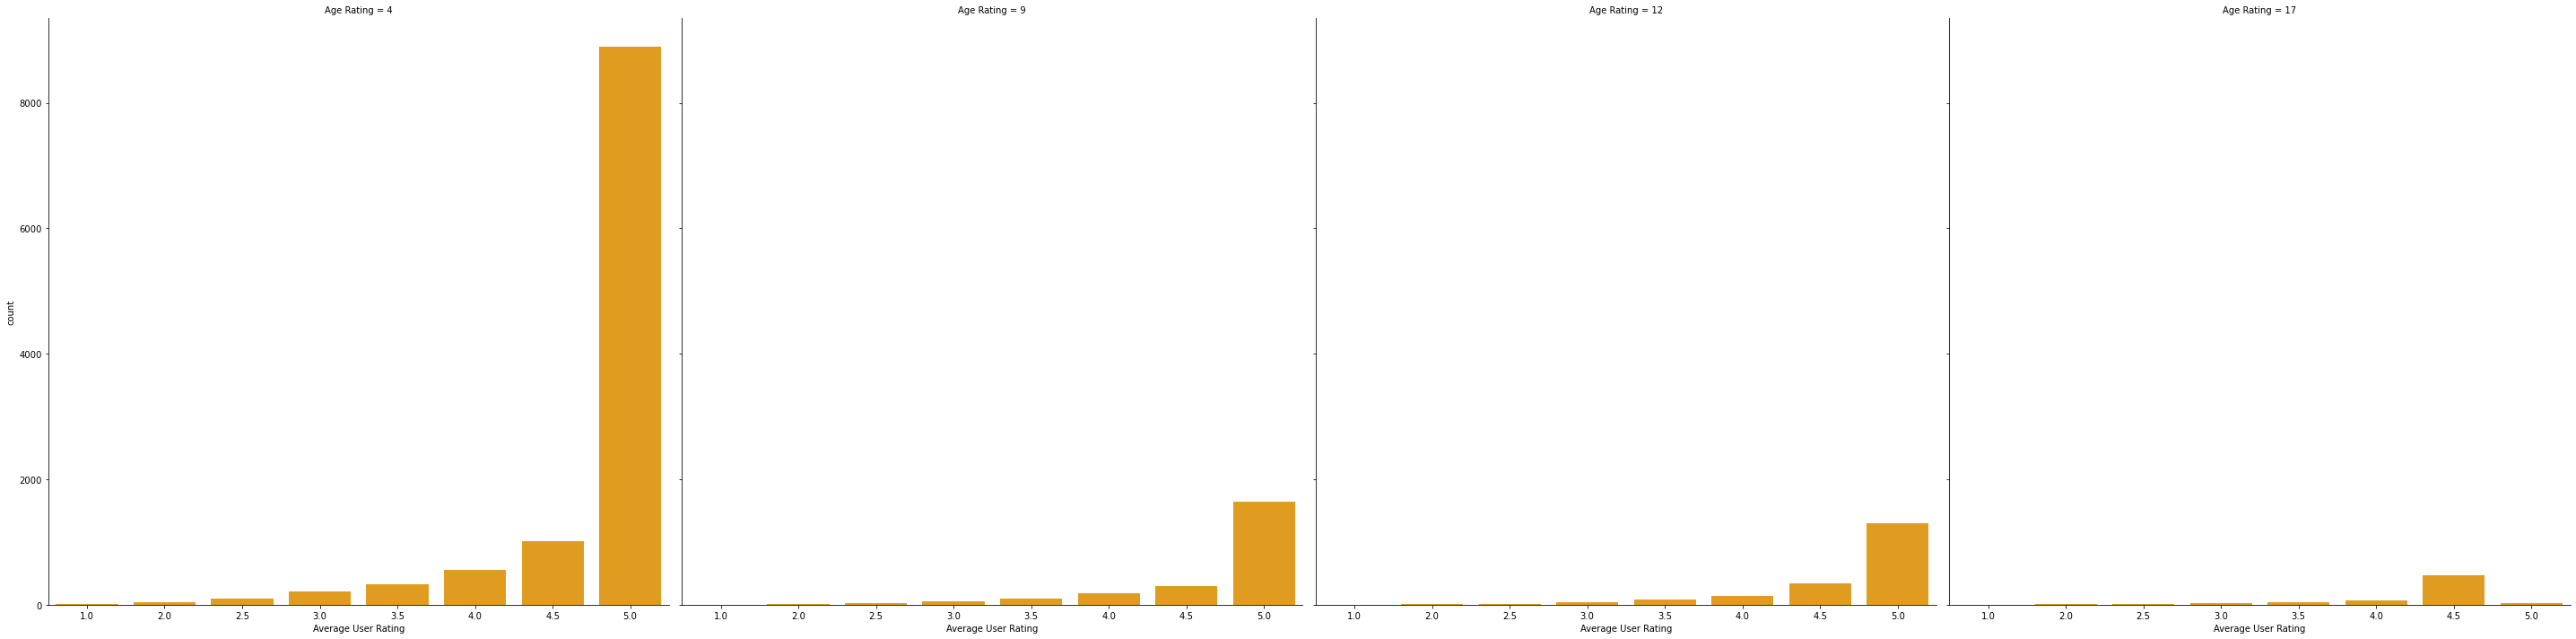

In [37]:
# phân tích từng nhóm tuổi với số sao trung bình đánh giá
age_rate = sns.FacetGrid(games, col = 'Age Rating',height=10)
age_rate.map(sns.countplot,'Average User Rating',color = 'orange')

In [38]:
primary_avg = games.groupby('Primary Genre')[['Average User Rating']].mean().sort_values(by = ['Average User Rating'], ascending = False)

fig = go.Figure(data=[
    go.Bar(name='Primary', x =primary_avg.index  ,y = primary_avg['Average User Rating'] , text= primary_avg['Average User Rating'], marker_color='darkblue')])
fig.update_layout(hoverlabel=dict(font=dict(family='sans-serif', size=25)),barmode='relative', template='plotly_dark', title_text='Xếp hạng người dùng theo thể loại chính', font_family="Courier New")
fig.update_yaxes(title_text='Average user rating', range=[0,5])
fig.update_xaxes(title_text='Primary Genre',tickfont_size=15)
fig.show()   

In [39]:
fig = px.histogram(games,x='Original Release Date', title="Số lượng game phát hành qua các năm",width=800,height=400)
fig.show()

###  Sự thay đổi qua các năm của các giá trị: Price, Size, User rating

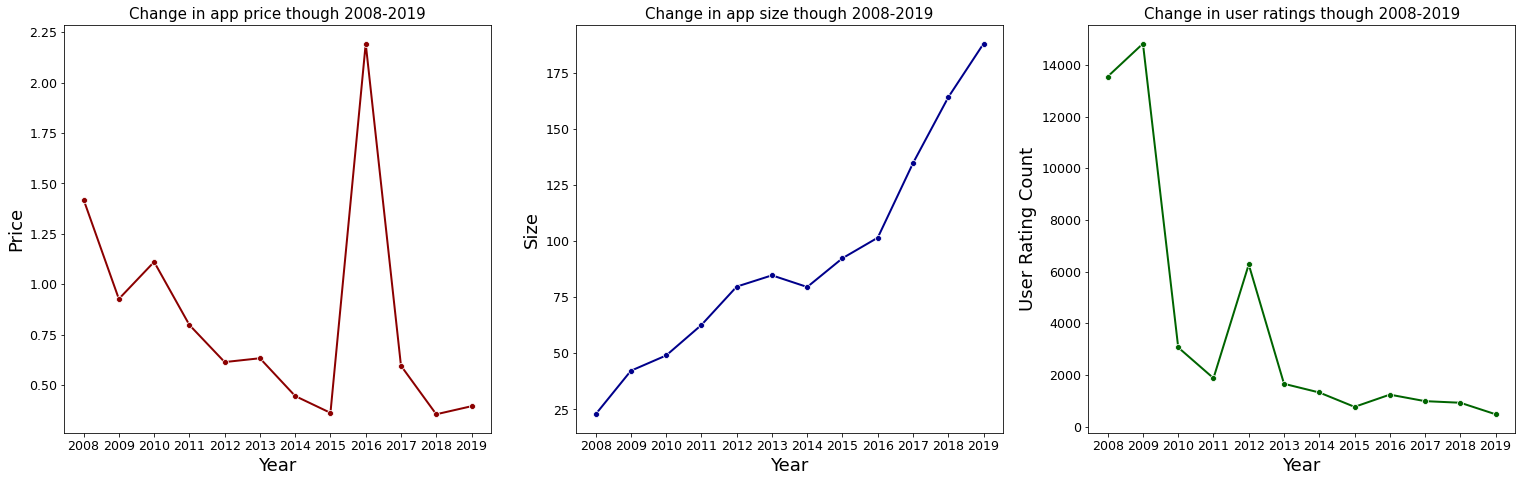

In [40]:
ord_price = games.groupby('Original Release Date')[['Price']].mean()
ord_size = games.groupby('Original Release Date')[['Size']].mean()
ord_urc = games.groupby('Original Release Date')[['User Rating Count']].mean()

fig, ax = plt.subplots(1, 3, figsize=(26, 7.5))

sns.lineplot(x='Original Release Date', y='Price', data=ord_price, color = 'darkred', ax=ax[0], marker='o', linewidth = 2)
ax[0].set_title('Change in app price though 2008-2019', fontsize = 15)
ax[0].tick_params(labelsize=12.6)
ax[0].set_xlabel('Year',fontsize = 18)
ax[0].set_ylabel('Price',fontsize = 18)

sns.lineplot(x='Original Release Date', y='Size', data=ord_size, color = 'darkblue', ax=ax[1], marker='o', linewidth = 2)
ax[1].set_title('Change in app size though 2008-2019', fontsize = 15)
ax[1].tick_params(labelsize=12.6)
ax[1].set_xlabel('Year',fontsize = 18)
ax[1].set_ylabel('Size',fontsize = 18)

sns.lineplot(x='Original Release Date', y='User Rating Count', data=ord_urc, color = 'darkgreen', ax=ax[2], marker='o', linewidth = 2)
ax[2].set_title('Change in user ratings though 2008-2019', fontsize = 15)
ax[2].tick_params(labelsize=12.6)
ax[2].set_xlabel('Year',fontsize = 18)
ax[2].set_ylabel('User Rating Count',fontsize = 18)

plt.show()

## 6. Model preparation

In [41]:
df = games.copy()
df['Average User Rating'] = df['Average User Rating'].astype(int)

*Encode data*

In [42]:
label_encoded=df[['User Rating Count', 'Price',  'Size', 'Developer', 'Languages','Primary Genre',
                     'Secondary Genre', 'Original Release Date', 'Current Version Release Date']]
                       
onehot_coded = df[['In-app Purchases', 'FreePaid', 'Age Rating']]
#mã hóa one-hot lên các cột
enc = OneHotEncoder(handle_unknown='ignore')
df_oh = pd.DataFrame(enc.fit_transform(onehot_coded).toarray(), columns = enc.get_feature_names()) 

df_le = label_encoded.apply(LabelEncoder().fit_transform)
dataframe = df_le.join(df_oh)
dataframe.head()

,User Rating Count,Price,Size,Developer,Languages,Primary Genre,Secondary Genre,Original Release Date,Current Version Release Date,x0_0,x0_1,x1_Free,x1_Paid,x2_4,x2_9,x2_12,x2_17
0,1192,3,1210,4801,16,6,37,0,9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,276,2,891,3992,0,6,37,0,10,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1411,0,20,905,0,6,4,0,9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1768,0,1723,4801,16,6,37,0,9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,23,3,2785,6067,14,6,37,0,10,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


*Split data*

In [43]:
Y = pd.DataFrame(df['Average User Rating'])
X = dataframe

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1) 

*Scale data*

In [45]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

*Model*

In [46]:
DT_Model = DecisionTreeClassifier(criterion='gini', max_depth=5)
DT_Model.fit(X_train, Y_train)
DT_Predict = DT_Model.predict(X_val)
DT_Accuracy = accuracy_score(Y_val, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.8254318265343623


In [47]:
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
DT_Model.fit(X_train, Y_train)
DT_Predict = DT_Model.predict(X_val)
DT_Accuracy = accuracy_score(Y_val, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.8195516354281515


In [48]:
print(confusion_matrix(Y_val, DT_Predict))

[[   0    0    4   13    4]
 [   0    3   14   57    6]
 [   2    3   31  164    8]
 [   1    0   33 2187   18]
 [   0    0    7  157    9]]


In [49]:
print(classification_report(Y_val, DT_Predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.50      0.04      0.07        80
           3       0.35      0.15      0.21       208
           4       0.85      0.98      0.91      2239
           5       0.20      0.05      0.08       173

    accuracy                           0.82      2721
   macro avg       0.38      0.24      0.25      2721
weighted avg       0.75      0.82      0.77      2721



In [50]:
DT_Model.score(X_train,Y_train)

0.8365490628445424

In [51]:
DT_Model.score(X_test,Y_test)

0.8253968253968254

In [52]:
out = Y_val

In [53]:
out['Prediction']=DT_Predict

In [54]:
out

,Average User Rating,Prediction
10606,4,4
14528,4,4
6518,4,4
16579,4,4
2925,4,4
...,...,...
9549,4,4
1935,4,4
10946,4,4
3021,4,4
